**AI-Usage** 

I utilized chat gpt to help me throughout this process. It gave me an outline of how to extract the features and target variables, intialize the models, and compute performance metrics to analyze the different models. After understanding how to perform this process for one model, I got help creating loops to loop through the different models and print out the performance metrics in an organized manner. Upon completing this portion of the machine learning process, it helped guide me towards understanding which features are most important and how to make predictions for a specfic player's passing yards. I provided more details towards how I engineered the code using prompts above their code blocks. 

The code developed in this file was guided by this conversation with ChatGPT.

**Here is the link to that chat:** https://chatgpt.com/share/67a7d9ef-d054-800f-a70d-36bf42bdf994

In [21]:
import pandas as pd
import numpy as np

# Load the dataset
qb_df = pd.read_csv("player_position_dataframes/qb_advanced_stats_rolling_2024.csv")

In [22]:
# Put 0s back in the dataframe for features 
qb_df.replace(np.nan, 0, inplace=True)

# qb_df = pd.get_dummies(qb_df, columns=['recent_team', 'opponent_team'], drop_first=True)

# X = qb_df.drop(columns=['player_id', 'player_name'])

In [23]:
# Features (independent variables)
features = [
    'completion_pct_rolling_3', 
    'yards_per_attempt_rolling_3',
    'td_pct_rolling_3', 
    'passer_rating_rolling_3',
    'adjusted_net_yards_per_attempt_rolling_3', 
    'rushing_yards_rolling_3', 
    'yards_per_carry_rolling_3'
]

# Target (dependent variable) 
target = 'passing_yards'

X = qb_df[features]
y = qb_df[target]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scalar preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Scale the training and testing features 
scaled_X_train = scaler.transform(X_train)  
scaled_X_test = scaler.transform(X_test)    


# Confirm the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 557
Testing set size: 140


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)


In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Compute metrics
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mbe = np.mean(y_pred - y_test)

# Print results
print(f"R² Score: {r2:.4f}")
# Adjust for the number of features used to help prevent overfitting
print(f"Adjusted R² Score: {adjusted_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Penalizes larger errors more
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# Measures models tendency to over or underestimate values 
print(f"Mean Bias Error (MBE): {mbe:.2f}")

R² Score: -0.0062
Adjusted R² Score: -0.0595
Mean Absolute Error (MAE): 75.09
Root Mean Squared Error (RMSE): 103.53
Mean Bias Error (MBE): 5.05


In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge 

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
for name, mdl in models.items():
    mdl.fit(scaled_X_train, y_train)
    y_pred = mdl.predict(scaled_X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mbe = np.mean(y_pred - y_test)
    
    # Print results with dividers
    print("=" * 50)  # Divider
    print(f"Model: {name}")
    print("=" * 50)
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adjusted_r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Bias Error (MBE): {mbe:.2f}")
    print("\n")  # Blank line for spacing

Model: Linear Regression
R² Score: -0.0062
Adjusted R² Score: -0.0595
Mean Absolute Error (MAE): 75.09
Root Mean Squared Error (RMSE): 103.53
Mean Bias Error (MBE): 5.05


Model: Random Forest
R² Score: 0.3345
Adjusted R² Score: 0.2992
Mean Absolute Error (MAE): 61.06
Root Mean Squared Error (RMSE): 84.20
Mean Bias Error (MBE): 5.88


Model: Ridge Regression
R² Score: 0.0058
Adjusted R² Score: -0.0469
Mean Absolute Error (MAE): 74.94
Root Mean Squared Error (RMSE): 102.91
Mean Bias Error (MBE): 4.89


Model: Gradient Boosting
R² Score: 0.3112
Adjusted R² Score: 0.2747
Mean Absolute Error (MAE): 62.31
Root Mean Squared Error (RMSE): 85.66
Mean Bias Error (MBE): 4.58




I was curious how to determine which features were the most significant. I asked ChatGPT how to tell which features were the most significant to my predicitions ,and it helped me to sort and plot my features. I had not seen this before in machine learning ,and it seems like it will be a useful tool when fine tuning the features for the different predicition models

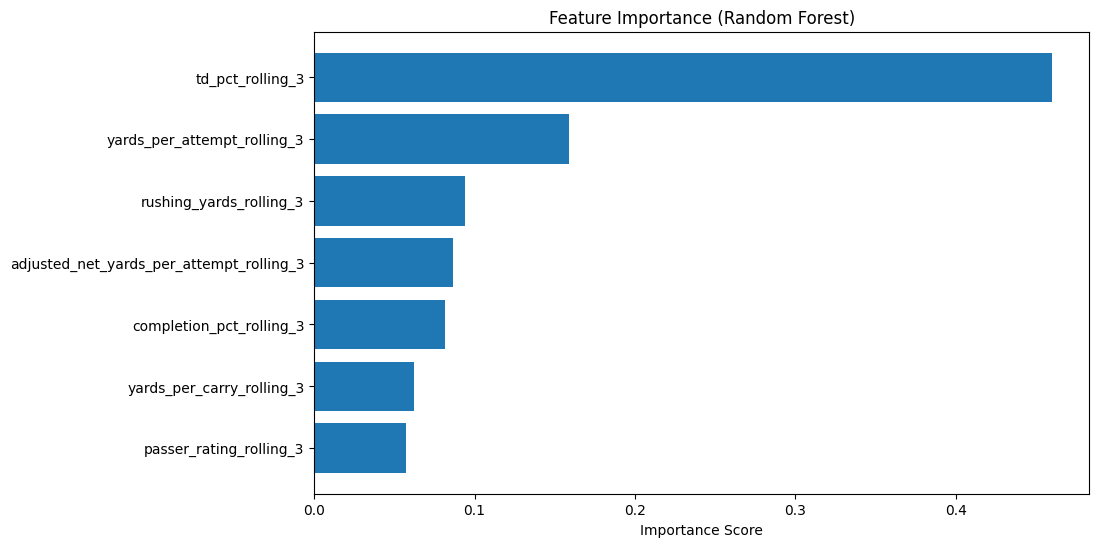

In [28]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Train a basic Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(scaled_X_train, y_train)


# Train a basic Random Forest model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(scaled_X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()

I asked ChatGPT for help on how to use my model to obtain a predicition for a specfic player. It helped provide a framework which I modified to fit the process of how I processed the data, extracted features, and created the models. Once I got the prediction for Aaron Rodgers to work correctly, I provided it with the list of qb's and asked it to help implement a method which went through each qb in the list and performed the predicition process for their week 18 passing yards. The below code is a result of that series of prompts with ChatGPT.

In [29]:
qb_list = ['A.Rodgers', 'J.Flacco', 'J.Johnson', 'M.Stafford', 'A.Dalton', 'T.Taylor',
 'R.Wilson', 'K.Cousins', 'G.Smith', 'T.Bridgewater', 'D.Carr', 'J.Garoppolo',
 'J.Winston', 'T.Heinicke', 'M.Mariota', 'B.Allen', 'C.Wentz', 'D.Prescott',
 'J.Goff', 'J.Brissett', 'N.Mullens', 'D.Watson', 'C.Rush', 'M.Trubisky',
 'P.Mahomes', 'J.Dobbs', 'T.Boyle', 'M.White', 'K.Allen', 'M.Rudolph',
 'L.Jackson', 'B.Mayfield', 'J.Allen', 'S.Darnold', 'J.Browning', 'K.Murray',
 'J.Stidham', 'G.Minshew', 'D.Lock', 'D.Jones', 'T.Huntley', 'T.Tagovailoa',
 'J.Love', 'J.Herbert', 'J.Hurts', 'J.Burrow', 'D.Mills', 'K.Trask', 'J.Fields',
 'T.Lawrence', 'M.Jones', 'T.Lance', 'S.Howell', 'C.Oladokun', 'S.Thompson',
 'B.Purdy', 'K.Pickett', 'B.Zappe', 'D.Ridder', 'M.Willis', 'T.McKee',
 'T.Bagent', 'T.DeVito', 'H.Hooker', "A.O'Connell", 'C.Tune',
 'D.Thompson-Robinson', 'J.Haener', 'B.Young', 'W.Levis', 'C.Stroud',
 'A.Richardson', 'S.Rattler', 'J.Milton', 'B.Nix', 'D.Maye', 'J.Daniels',
 'M.Penix', 'C.Williams']

print("=" * 60)
print("WEEK 18 PASSING YARDS PREDICTIONS")
print("=" * 60)

for qb in qb_list:
    # Filter dataset for current QB in Week 18
    qb_data = qb_df[(qb_df['player_name'] == qb) & (qb_df['week'] == 18)]

    if not qb_data.empty:
        # Extract features and scale
        qb_X = qb_data[features]
        scaled_features = scaler.transform(qb_X)

        # Predict passing yards
        predicted_yards_rf = rf.predict(scaled_features)[0]
        predicted_yards_gb = gb.predict(scaled_features)[0]

        print(f"{qb}:")
        print(f"   - Random Forest: {predicted_yards_rf:.2f} yards")
        print(f"   - Gradient Boosting: {predicted_yards_gb:.2f} yards")
        print("-" * 50)
    else:
        print(f"No Week 18 data found for {qb}")

print("=" * 60)


WEEK 18 PASSING YARDS PREDICTIONS
A.Rodgers:
   - Random Forest: 256.17 yards
   - Gradient Boosting: 268.38 yards
--------------------------------------------------
J.Flacco:
   - Random Forest: 259.29 yards
   - Gradient Boosting: 240.43 yards
--------------------------------------------------
No Week 18 data found for J.Johnson
No Week 18 data found for M.Stafford
No Week 18 data found for A.Dalton
No Week 18 data found for T.Taylor
R.Wilson:
   - Random Forest: 157.69 yards
   - Gradient Boosting: 159.66 yards
--------------------------------------------------
No Week 18 data found for K.Cousins
G.Smith:
   - Random Forest: 253.02 yards
   - Gradient Boosting: 258.67 yards
--------------------------------------------------
No Week 18 data found for T.Bridgewater
No Week 18 data found for D.Carr
J.Garoppolo:
   - Random Forest: 241.75 yards
   - Gradient Boosting: 264.97 yards
--------------------------------------------------
No Week 18 data found for J.Winston
No Week 18 data foun